Flight Price Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
flight_price=pd.read_csv("./datasets/flight_price_prediction.csv",index_col = False)

In [3]:
# Removing of unnamed column
flight_price.drop('Unnamed: 0',axis = 1, inplace = True)

In [4]:
#Getting the info of columns
flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
#Generating statistics of features
flight_price.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [6]:
#Checking if there are any null values or not
flight_price.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

DATA VISUALIZATION


Text(0.5, 1.0, 'Frequency of Departing Flights during different times')

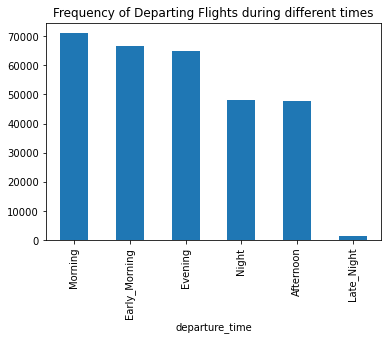

In [7]:
#1.No of flights which fly at different times...--> to  check the frequency
flight_freq=flight_price.value_counts('departure_time')
y=flight_freq.plot.bar()
y.set_title('Frequency of Departing Flights during different times')

Text(0.5, 1.0, 'Frequency of Arrival Flights during different times')

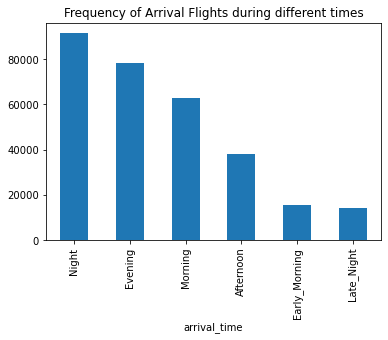

In [8]:
flight_freq=flight_price.value_counts('arrival_time')
y=flight_freq.plot.bar()
y.set_title('Frequency of Arrival Flights during different times')

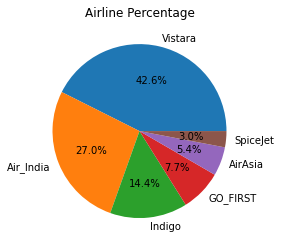

In [9]:
#2.Percentage of each airline
counts = flight_price['airline'].value_counts()
# Plot a pie chart
fig, ax = plt.subplots()
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Airline Percentage')
plt.show()

Text(0.5, 1.0, 'Airline vs Source_city\n')

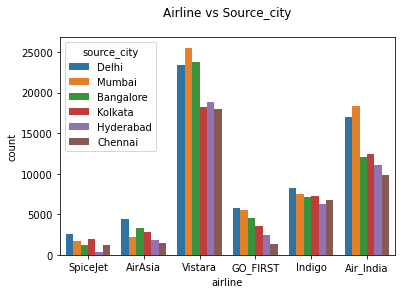

In [10]:
#3.Number of flights of different airlines from each city 
sns.countplot(data=flight_price, x='airline',hue='source_city')
plt.title('Airline vs Source_city\n')

Text(0.5, 1.0, 'Days_left vs Price\n')

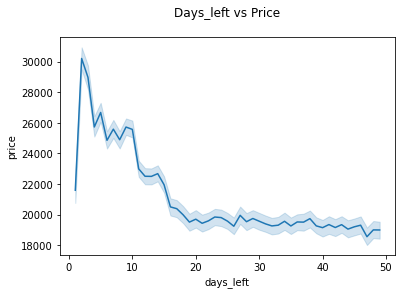

In [11]:
#4.Price variation as the number of days decrease
sns.lineplot(data=flight_price, x='days_left', y='price')
plt.title('Days_left vs Price\n')

Text(0.5, 1.0, 'Duration between two cities\n')

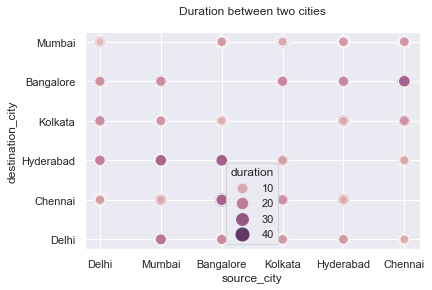

In [12]:
#5 Duration of journey between two cities
sns.set(style="darkgrid")
x = flight_price['source_city']
y = flight_price['destination_city']
z = flight_price['duration']

sns.scatterplot(x=x, y=y, hue=z, size=z, sizes=(50, 200))
plt.title('Duration between two cities\n')

In [13]:
# remove flight column
flight_price.drop('flight',axis = 1,inplace = True)

In [14]:
#Converting Categorical Columns to numerical columns
flight_price = pd.get_dummies(flight_price)

In [15]:
flight_price

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
300149,10.42,49,77105,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300150,13.83,49,79099,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300151,10.00,49,81585,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


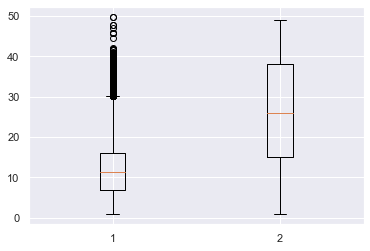

In [16]:
# checking for outliers in numerical independent columns
plt.boxplot(flight_price[['duration','days_left']])
plt.show()

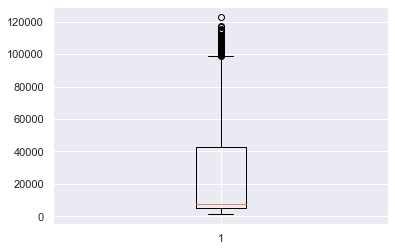

In [17]:
# checking for outliers in target column
plt.boxplot(flight_price['price'])
plt.show()

In [18]:
# normalizing the numerical columns
numcols =['duration', 'days_left']
for i in numcols:
    flight_price[i] = (flight_price[i]-flight_price[i].min())/(flight_price[i].max()-flight_price[i].min())

<AxesSubplot:>

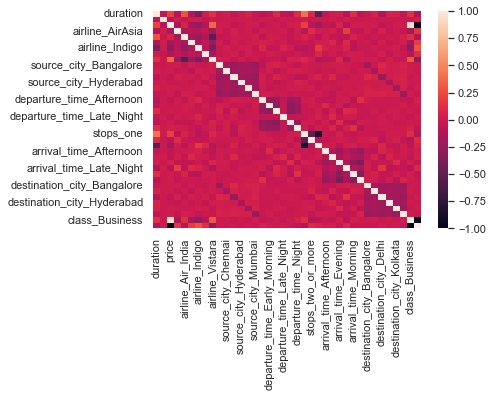

In [19]:
# correlation
sns.heatmap(flight_price.corr())

In [20]:
# Removing of stops_zero column - feature selection
flight_price.drop('stops_zero',axis = 1,inplace = True)

In [21]:
# Split data into test and train
flight_price = flight_price.sample(frac=1)
train_data = flight_price[0:int(len(flight_price)*0.8)]
test_data = flight_price[int(len(flight_price)*0.8):]

In [22]:
# Printing the shapes of X_train,y_train, X_test, y_test
X_train = np.array(train_data.drop('price',axis = 1))
y_train = np.array(train_data['price']).reshape(-1,1)
X_test = np.array(test_data.drop('price',axis = 1))
y_test = np.array(test_data['price']).reshape(-1,1)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (240122, 36)
Shape of y_train: (240122, 1)
Shape of X_test: (60031, 36)
Shape of y_test: (60031, 1)


## Linear Regression

In [23]:
# Linear Regression
def calculate_weights(X,y):
    w = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y)
    return w
def calculate_MSE(w,X,y):
    pred = np.dot(X,w)
    MSE_loss = np.dot((y-pred).T,(y-pred))/len(X)
    return pred,MSE_loss

In [24]:
weights = calculate_weights(X_train,y_train)
weights

array([[  2080.90921271],
       [ -6314.4052141 ],
       [  1383.78152258],
       [  1507.67556384],
       [  3066.57767677],
       [  3497.40850047],
       [  3653.08154404],
       [  5452.78993869],
       [  3394.22352461],
       [  3285.10262172],
       [  1997.61004709],
       [  1719.96259958],
       [  4969.46938747],
       [  3194.94656593],
       [  2278.70291872],
       [  3121.66098641],
       [  3023.79593502],
       [  4002.8040562 ],
       [  3142.20603647],
       [  2992.14481358],
       [  7600.80662631],
       [  9717.19646399],
       [  2652.91275528],
       [  1880.75369555],
       [  3575.98384279],
       [  3578.19802653],
       [  3097.77614292],
       [  3775.69028333],
       [  3430.8412335 ],
       [  3230.5120266 ],
       [  1919.34191598],
       [  1723.95886752],
       [  4841.95675919],
       [  3414.70394361],
       [ 31752.14510272],
       [-13190.83035633]])

In [25]:
# predictions and loss for train data
y_train_pred, MSE_loss_train = calculate_MSE(weights,X_train,y_train)
print('Mean Squared Error for Train data:',MSE_loss_train[0][0])

Mean Squared Error for Train data: 45451763.27047183


In [26]:
# predictions and loss for test data
y_test_pred, MSE_loss_test = calculate_MSE(weights,X_test,y_test)
print('Mean Squared Error for Test data:',MSE_loss_test[0][0])

Mean Squared Error for Test data: 46280193.48798858


<AxesSubplot:>

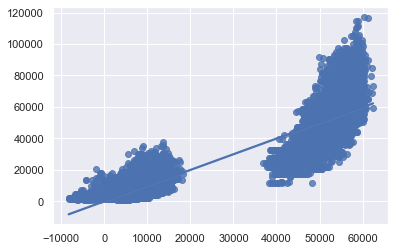

In [27]:
# plot of predictions vs actual
sns.regplot(x = y_test_pred,y = y_test)

In [28]:
# save weights as pickle file
pickle.dump(weights, open('keerthyp_syanamad_assignment1_part2.pkl', 'wb'))

## Ridge Regression

In [29]:
# Ridge Regression
def calculate_weights(X,y,lmbd_val):
    w = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)+lmbd_val*np.identity(X_train.shape[1])),X.T),y)
    return w
def calculate_MSE(w,X,y,lmbd_val):
    pred = np.dot(X,w)
    MSE_loss = (np.dot((y-pred).T,(y-pred))/len(X)) + (0.5*lmbd_val*np.dot(w.T,w))
    return pred,MSE_loss

In [30]:
lambda_value = 0.006

In [31]:
weights = calculate_weights(X_train,y_train,lambda_value)
weights

array([[  2080.91447242],
       [ -6314.40017682],
       [  1383.78100968],
       [  1507.67604862],
       [  3066.57579723],
       [  3497.40757182],
       [  3653.077082  ],
       [  5452.79069757],
       [  3394.22257114],
       [  3285.10120921],
       [  1997.60940033],
       [  1719.96137156],
       [  4969.46797402],
       [  3194.9456113 ],
       [  2278.7058625 ],
       [  3121.6638454 ],
       [  3023.79851918],
       [  4002.78373953],
       [  3142.20892399],
       [  2992.14721232],
       [  7600.80524131],
       [  9717.18835518],
       [  2652.91156685],
       [  1880.75292199],
       [  3575.98303768],
       [  3578.19581564],
       [  3097.77520098],
       [  3775.68955577],
       [  3430.84015641],
       [  3230.51078573],
       [  1919.34125265],
       [  1723.95765612],
       [  4841.95553736],
       [  3414.70285295],
       [ 31752.13957059],
       [-13190.8313305 ]])

In [32]:
# predictions and loss for train data
y_train_pred, MSE_loss_train = calculate_MSE(weights,X_train,y_train,lambda_value)
print('Mean Squared Error for Train data:',MSE_loss_train[0][0])

Mean Squared Error for Train data: 50535490.228481755


In [33]:
# predictions and loss for test data
y_test_pred, MSE_loss_test = calculate_MSE(weights,X_test,y_test,lambda_value)
print('Mean Squared Error for Test data:',MSE_loss_test[0][0])

Mean Squared Error for Test data: 51363920.17872904


<AxesSubplot:>

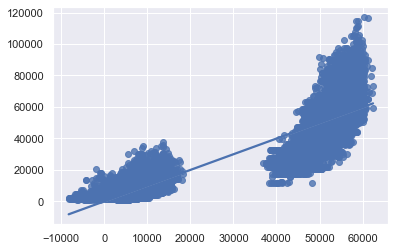

In [34]:
# plot of predictions vs actual
sns.regplot(x = y_test_pred,y = y_test)

In [35]:
# save weights as pickle file
pickle.dump(weights, open('keerthyp_syanamad_assignment1_part3.pkl', 'wb'))